## Problem : Detect new items/people in a surveillance video

- Video: Sequence of images typically at 24 FPS or 30 FPS
- Simplest wat to detect items/people: Subtraction
- More complex ML model based systems also exist

In [2]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [3]:
! wget https://github.com/opencv/opencv/blob/master/samples/data/vtest.avi

--2022-05-15 04:54:43--  https://github.com/opencv/opencv/blob/master/samples/data/vtest.avi
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘vtest.avi’

vtest.avi               [ <=>                ] 124.50K  --.-KB/s    in 0.08s   

2022-05-15 04:54:44 (1.57 MB/s) - ‘vtest.avi’ saved [127487]



In [4]:
!ls -l

total 132
drwxr-xr-x 1 root root   4096 May  3 13:42 sample_data
-rw-r--r-- 1 root root 127487 May 15 04:54 vtest.avi


In [5]:
cap = cv2.VideoCapture('vtest.avi')
print(cap)
ret, frame = cap.read()
print(ret)
print(frame.shape)
cv2_imshow(frame)
cap.release()

<VideoCapture 0x7f1bbcc90a30>
False


AttributeError: ignored

In [6]:
! wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1RfcoodYTKdcWbiZYmvIARpPZJansboay' -O vtest.mp4

--2022-05-15 05:03:31--  https://docs.google.com/uc?export=download&id=1RfcoodYTKdcWbiZYmvIARpPZJansboay
Resolving docs.google.com (docs.google.com)... 142.250.136.102, 142.250.136.138, 142.250.136.113, ...
Connecting to docs.google.com (docs.google.com)|142.250.136.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-1o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cbqhlkt2fe93cog667sevta3necj4fi8/1652590950000/06629147635963609455/*/1RfcoodYTKdcWbiZYmvIARpPZJansboay?e=download [following]
--2022-05-15 05:03:33--  https://doc-0s-1o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cbqhlkt2fe93cog667sevta3necj4fi8/1652590950000/06629147635963609455/*/1RfcoodYTKdcWbiZYmvIARpPZJansboay?e=download
Resolving doc-0s-1o-docs.googleusercontent.com (doc-0s-1o-docs.googleusercontent.com)... 142.251.120.132, 2607:f8b0:4001:c2e::84
Connecting to doc-0s-1o-docs.googleusercontent.com (doc-0s-1o-docs

In [7]:
!ls -l

total 5812
drwxr-xr-x 1 root root    4096 May  3 13:42 sample_data
-rw-r--r-- 1 root root  127487 May 15 04:54 vtest.avi
-rw-r--r-- 1 root root 5813102 May 15 05:03 vtest.mp4


<VideoCapture 0x7f1baf6da170>
True
(576, 768, 3)


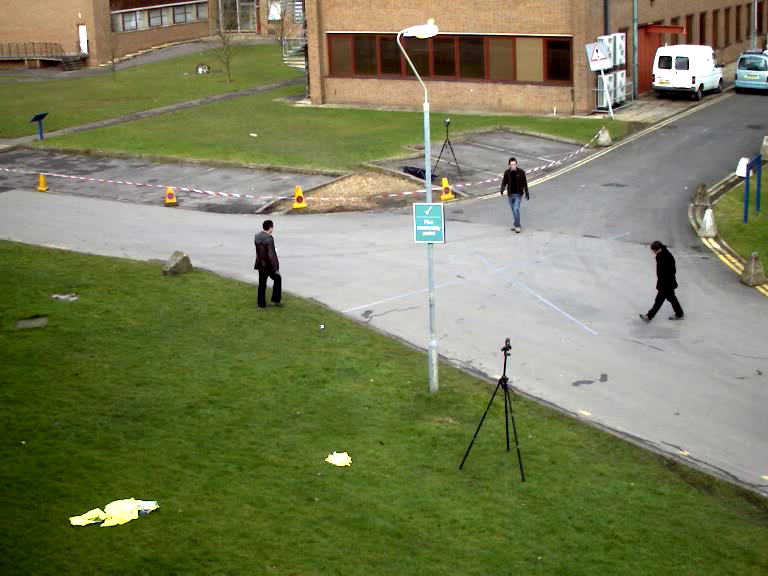

In [8]:
cap = cv2.VideoCapture('vtest.mp4')
print(cap)
ret, frame = cap.read()
print(ret)
print(frame.shape)
cv2_imshow(frame)
cap.release()

<VideoCapture 0x7f1bae6b4f10>


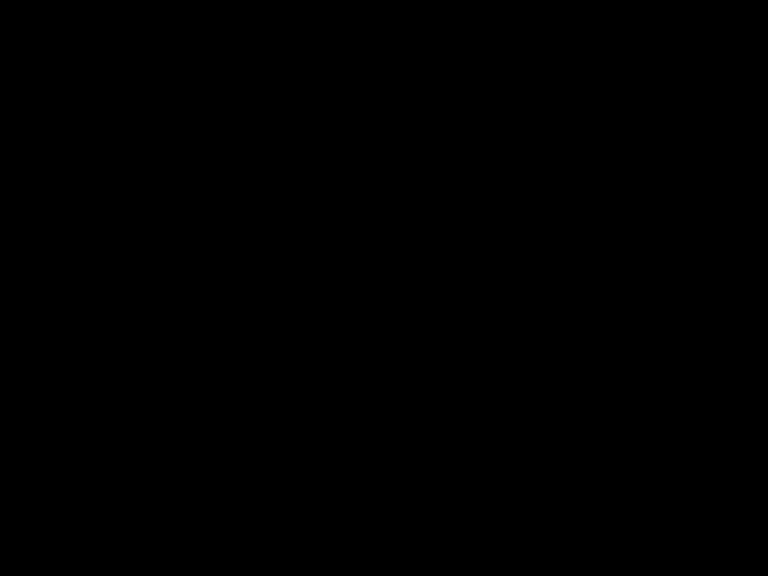

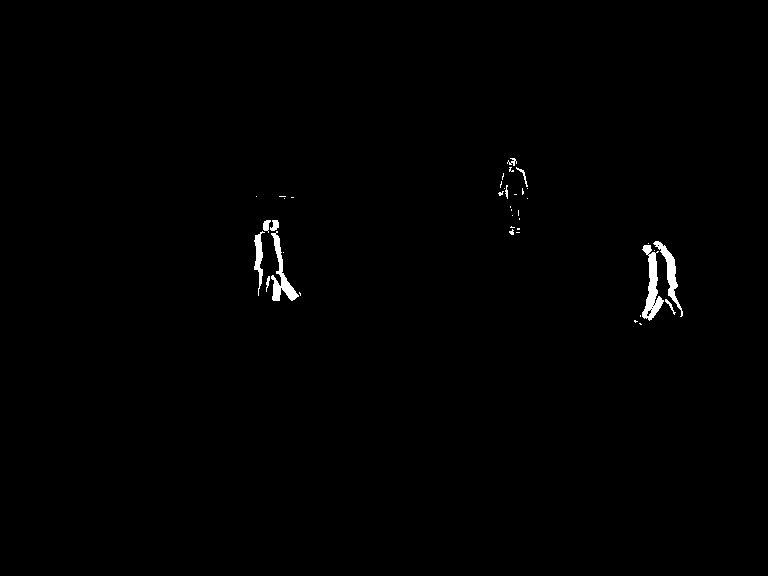

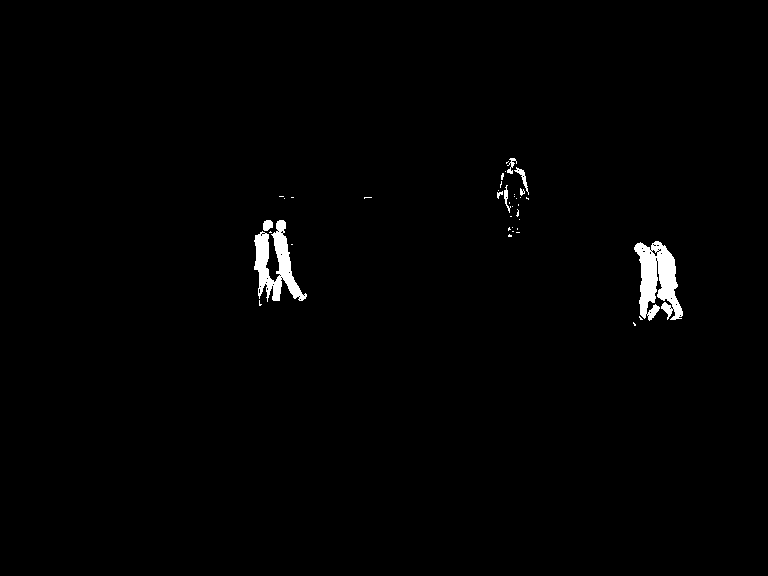

In [10]:
cap = cv2.VideoCapture('vtest.mp4')
print(cap)

#foreground and background
fgbg = cv2.bgsegm.createBackgroundSubtractorMOG()
cnt = 0
while (cnt<3):
  ret, frame = cap.read()
  fgmask = fgbg.apply(frame)
  cv2_imshow(fgmask)
  cnt = cnt+1
cap.release()
cv2.destroyAllWindows()

# .avi in Jupyter 

In [1]:
import numpy as np
import cv2

body_classifier = cv2.CascadeClassifier('haarcascade_fullbody.xml')

cap = cv2.VideoCapture("walking.avi")

while cap.isOpened():
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    bodies = body_classifier.detectMultiScale(gray, 1.2,3)
    for (x,y,w,h) in bodies:
        cv2.rectangle(frame, (x,y),(x+w, y+h),(0,255,255),2)
        cv2.imshow('Person Walking on the street', frame)
    if cv2.waitKey(1)==13:
        break
cap.release()
cv2.destroyAllWindows()

In [1]:
# another project with .avi file 
import time
import cv2
import numpy as np
car_file = cv2.CascadeClassifier('haarcascade_car.xml')
cap = cv2.VideoCapture('cars.avi')
while cap.isOpened():
    time.sleep(.05)
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cars = car_file.detectMultiScale(gray, 1.4,2)
    for (x,y,w,h) in cars:
        cv2.rectangle(frame, (x,y),(x+w, y+h),(0,255,255),2)
        cv2.imshow('Cars running on highway', frame)
    if cv2.waitKey(1)==13:
        break
cap.release()
cv2.destroyAllWindows()    

In [2]:
import os
os.getcwd()

'C:\\Users\\Lenovo\\Desktop\\PGA01'

In [6]:
# project 
import cv2
import numpy as np
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('haarcascade_eye.xml')

def face_eye(img, size=0.5):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3,5)
    
    if faces is ():
        return img
    
    for (x,y,w,h) in faces:
        x = x - 50
        w = w + 50
        y = y - 50
        h = h + 50
        cv2.rectangle(img, (x,y),(x+w, y+h),(127,0,255),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        eyes = eye_classifier.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew, ey+eh),(0,0,255),2)
            
    roi_color = cv2.flip(roi_color, 1)
    return roi_color
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    cv2.imshow("My face and eyes", face_eye(frame))
    if cv2.waitKey(1)== 13:
        break
cap.release()
cv2.destroyAllWindows()

<>:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_11120/1208237303.py:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


In [2]:
cv2.destroyAllWindows()